In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#encoding all the text data 
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [6]:
X = data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = data['Selling_Price']


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [9]:
prediction = model.predict(X_train)


In [10]:
#since we are using linear regression we can find the error using R squared error

error = metrics.r2_score(Y_train, prediction)
print(error)

0.8799451660493699


Text(0, 0.5, 'Our prediction')

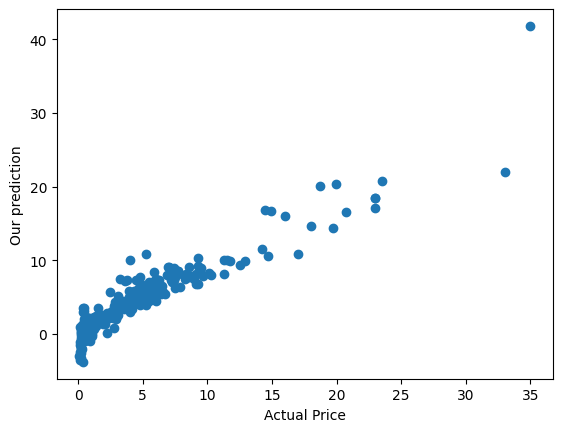

In [11]:
#now we can visualise the predicitons we have generated

plt.scatter(Y_train, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Our prediction")

In [13]:
#using the test data set 
prediction2= model.predict(X_test)

error2 = metrics.r2_score(Y_test, prediction2)
print(error2)

0.8365766715026473


Text(0, 0.5, 'test results')

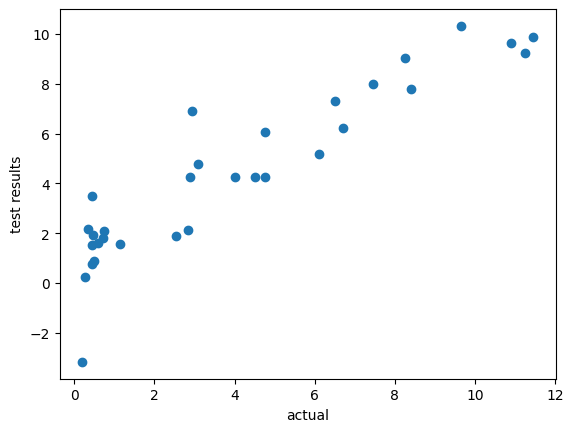

In [14]:
plt.scatter(Y_test, prediction2)
plt.xlabel("actual")
plt.ylabel("test results")

This problem can also be solved using Lasso Regression Model

In Lasso Regression the data is shrinked towards a mean, by doing this error can be reduced

In [15]:
model2= Lasso()
model2.fit(X_train, Y_train)

Lasso()

In [16]:
#prediciton on test data

predcition3 = model2.predict(X_test)

error3 = metrics.r2_score(Y_test, predcition3)
print(error3)

0.8709167941173201


Text(0, 0.5, 'lasso prediction')

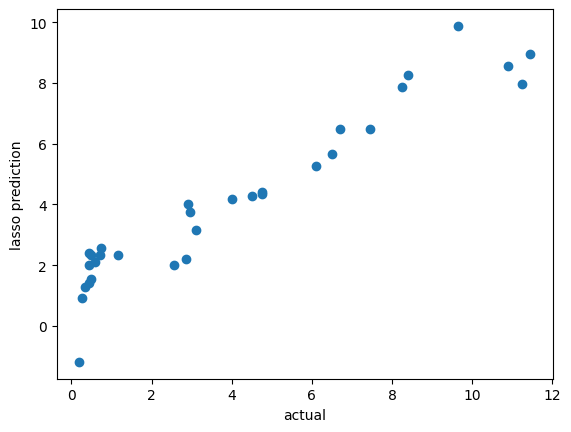

In [17]:
plt.scatter(Y_test, predcition3)
plt.xlabel("actual")
plt.ylabel("lasso prediction")